# Analysing Star Wars Survey on Python
## <span style='background :yellow' > By MANUEL LA CHICA MALDONADO </span>

The team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered:

*Does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?*

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 1187 total responses, which you can download from their [GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

For this project, I'll be cleaning and exploring the data set in Jupyter notebook.

At the end of this project we want to get answers for the following questions:

* [Wich Star Wars movie is the most popular among fans ?](#The-most-popular-Star-Wars-movie)
* [Wich Star Wars movie is the most seen among fans ?](#The-most-seen-Star-Wars-movie)
* [Wich Star Wars movie is the most popular among fans ? (by gender)](#The-most-popular-Star-Wars-movie-by-gender
)
* [Wich Star Wars movie is the most seen among fans ? (by gender)](#The-most-seen-Star-Wars-movie-by-gender)
* [What is the location of Star Wars fans ?](#Location-of-Star-wars-fans-respondents)
* [What is the education level for Star Wars fans ?](#Education-level-for-Star-Wars-fans)

* [Conclusions](#Conclusions:)

## Importing libraries and the dataset

**The following code will read the data into a pandas dataframe:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# We need to specify the "ISO-8859-1" encoding because the data set has some characters that aren't in Python's default "utf-8" encoding.
star_wars = pd.read_csv('ProjectsDataSets/StarWars.csv', encoding='ISO-8859-1')
pd.set_option('display.max_columns', None)

## Exploring the dataset

**Let's get some information about the dataframe**

In [2]:
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 38 columns):
 #   Column                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                         --------------  -----  
 0   RespondentID                                                                                                                                   1186 non-null   float64
 1   Have you seen any of the 6 films in the Star Wars franchise?                                                                                   1187 non-null   object 
 2   Do you consider yourself to be a fan of the Star Wars film franchise?                                                                          837 non-null    object 
 3   Which of the following Star 

**Exploring the first 10 rows to find any strange values in columns or rows**

In [3]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return 

*Here we can review the column names*

In [4]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

## Data cleaning

**Let's remove any row where 'RespondentID' is NaN using the *pandas.notnull( )* function**

In [5]:
star_wars = star_wars[pd.notnull(star_wars['RespondentID'])]

In [6]:
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1186 entries, 1 to 1186
Data columns (total 38 columns):
 #   Column                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                         --------------  -----  
 0   RespondentID                                                                                                                                   1186 non-null   float64
 1   Have you seen any of the 6 films in the Star Wars franchise?                                                                                   1186 non-null   object 
 2   Do you consider yourself to be a fan of the Star Wars film franchise?                                                                          836 non-null    object 
 3   Which of the following Star 

**We can see now there are 1186 entries in the dataframe, meaning that we have removed 1 row**

Let's take a look at the next two columns, which are:

* Have you seen any of the 6 films in the Star Wars franchise?
* Do you consider yourself to be a fan of the Star Wars film franchise?

In [7]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [8]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].isnull().sum()

0

In [9]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [10]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].isnull().sum()

350

* The first column has no null values

* The second column has 350 null values 

Both columns are strings and it will be much easier to analyse if we convert them to *boolean*, having only the values: True, False, NaN. 

**We can use the pandas.Series.map( ) method to perform the conversion.**

In [11]:
yes_no = {'Yes':True, 'No':False}


for col in ['Have you seen any of the 6 films in the Star Wars franchise?',
            'Do you consider yourself to be a fan of the Star Wars film franchise?'
            ]:
    star_wars[col] = star_wars[col].map(yes_no)


We can check now if the changes has been applied 

In [12]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [13]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

Both columns have now *boolean* values

The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, **Which of the following Star Wars films have you seen? Please select all that apply.**

The columns for this question are:

* **Which of the following Star Wars films have you seen? Please select all that apply.** - Whether or not the respondent saw Star Wars: Episode I The Phantom Menace.
* **Unnamed: 4** - Whether or not the respondent saw Star Wars: Episode II Attack of the Clones.
* **Unnamed: 5** - Whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.
* **Unnamed: 6** - Whether or not the respondent saw Star Wars: Episode IV A New Hope.
* **Unnamed: 7** - Whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.
* **Unnamed: 8** - Whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is *NaN*, the respondent either didn't answer or didn't see the movie. **We'll assume that they didn't see the movie.**

**We'll need to convert each of these columns to a Boolean. We can convert the values the same way we did earlier, except that we'll need to include the movie title and NaN in the mapping dictionary.**


In [14]:
movie_mapping = {'Star Wars: Episode I  The Phantom Menace': True,
                 'Star Wars: Episode II  Attack of the Clones': True,
                 'Star Wars: Episode III  Revenge of the Sith': True,
                 'Star Wars: Episode IV  A New Hope': True,
                 'Star Wars: Episode V The Empire Strikes Back': True,
                 'Star Wars: Episode VI Return of the Jedi': True,
                  np.nan: False
                  }

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_mapping)

**Next, we'll need to rename the columns to better reflect what they represent.**

In [15]:
star_wars = star_wars.rename(columns = {'Which of the following Star Wars films have you seen? Please select all that apply.':'seen_1',
                                        'Unnamed: 4':'seen_2',
                                        'Unnamed: 5':'seen_3',
                                        'Unnamed: 6':'seen_4',
                                        'Unnamed: 7':'seen_5',
                                        'Unnamed: 8':'seen_6'
                                        })


**Let's see now the changes we have made!**

In [16]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,4,6,2,1,3,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


The next six columns ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. Each of the following columns can contain the value *1, 2, 3, 4, 5, 6, or NaN.*

The columns are:

* **Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.** - How much the respondent liked Star Wars: Episode I The Phantom Menace
* **Unnamed: 10** - How much the respondent liked Star Wars: Episode II Attack of the Clones
* **Unnamed: 11** - How much the respondent liked Star Wars: Episode III Revenge of the Sith
* **Unnamed: 12** - How much the respondent liked Star Wars: Episode IV A New Hope
* **Unnamed: 13** - How much the respondent liked Star Wars: Episode V The Empire Strikes Back
* **Unnamed: 14** - How much the respondent liked Star Wars: Episode VI Return of the Jedi

Fortunately, these columns don't require a lot of cleanup. **We'll need to convert each column to a numeric type, because they are an object type at the moment**

In [17]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

**Now, we are going to give each column a more descriptive name. We suggest *ranking_1, ranking_2,* and so on.**

In [18]:
star_wars = star_wars.rename(columns = {'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'ranking_1',
                                        'Unnamed: 10':'ranking_2',
                                        'Unnamed: 11':'ranking_3',
                                        'Unnamed: 12':'ranking_4',
                                        'Unnamed: 13':'ranking_5',
                                        'Unnamed: 14':'ranking_6'
                                        })

**Let's see the new changes**

In [19]:
star_wars.head(3)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central


## Data analysis

Recall that the respondent was asked to rank the Star Wars movies in order of least favorite to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. Now that we've cleaned up the ranking columns, we can find the highest-ranked movie more quickly. To do this, we will take the mean of each of the ranking columns using the pandas. DataFrame.mean( ) method on dataframes wich means that the movie with the lowest ranking is the best!

### The most popular Star Wars movie

**Computing the MEAN of each of the ranking columns, we can find the highest-ranked movie more quickly** 

In [20]:
star_wars[star_wars.columns[9:15]].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

**Let's plot the MEAN of the ranking results using a bar chart**

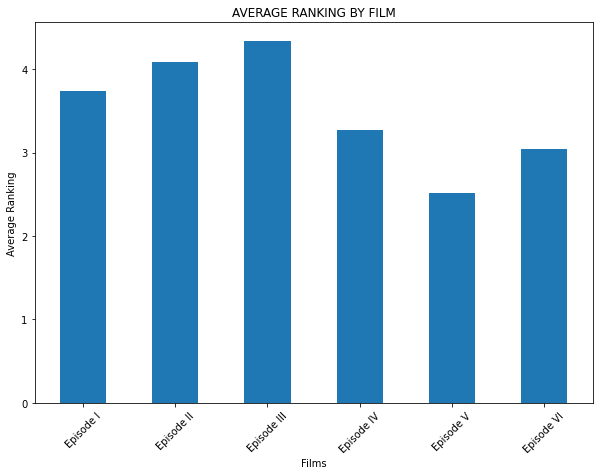

In [21]:
num_cols = ['Episode I', 'Episode II', 'Episode III', 'Episode IV', 'Episode V', 'Episode VI']

plt.figure(figsize=(10, 7))

plt.bar(range(6), star_wars[star_wars.columns[9:15]].mean(), 0.5) 

plt.xticks(range(6), num_cols, rotation = 45)

plt.xlabel('Films')
plt.ylabel('Average Ranking')
plt.title('AVERAGE RANKING BY FILM')

plt.show()

### The most seen Star Wars movie

**Now, we are going to compute the SUM of each of the *seen* columns, with this we can figure out how many people have seen each movie**

In [22]:
star_wars[star_wars.columns[3:9]].sum()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

**Let's plot the SUM of the each film using a bar chart**

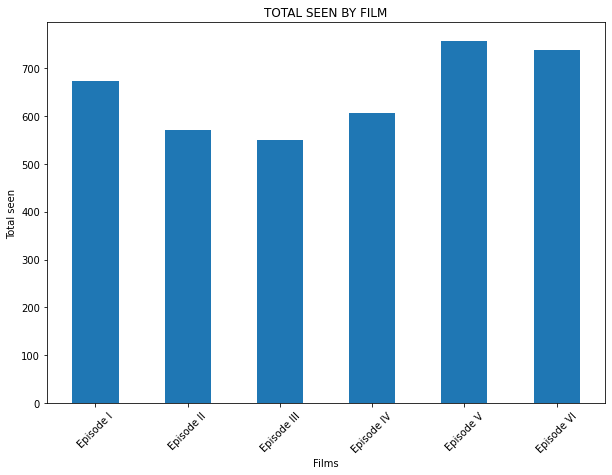

In [23]:
num_cols = ['Episode I', 'Episode II', 'Episode III', 'Episode IV', 'Episode V', 'Episode VI']

plt.figure(figsize=(10, 7))

plt.bar(range(6), star_wars[star_wars.columns[3:9]].sum(), 0.5) 

plt.xticks(range(6), num_cols, rotation = 45)

plt.xlabel('Films')
plt.ylabel('Total seen')
plt.title('TOTAL SEEN BY FILM')

plt.show()

### First conclusions

In order to understand the conclusions:

Star Wars movies in production order:

* **Episode IV**: A New Hope (1977)
* **Episode V**: The Empire Strikes Back (1980)
* **Episode VI**: Return of the Jedi (1983)
* **Episode I**: The Phantom Menace (1999)
* **Episode II**: Attack of the Clones (2002)
* **Episode III**: Revenge of the Sith (2005)

As I suspected and as I have read on internet, it looks like the original movies (*Episode IV, V and VI*) are rated much more highly than the newer ones. 

It appears that the original movies were seen by more respondents than the newer movies (*Episode I, II and III*). This reinforces what we saw in the rankings, where the earlier movies seem to be more popular.

### The most popular Star Wars movie by gender

We know which movies the survey population as a whole has ranked the highest. Now let's examine how certain segments of the survey population responded. We can split a dataframe into two groups based on a binary column by creating two subsets of that column. For example, we can split on the *Gender*.

**Let's create two subsets that will allow us to compute the most viewed movie and the highest-ranked movie**

In [24]:
# creating the two subsets

males = star_wars[star_wars['Gender'] == 'Male']

females = star_wars[star_wars['Gender'] == 'Female']

In [25]:
# exploring number of rows and columns
males.shape

(497, 38)

In [26]:
# exploring number of rows and columns
females.shape

(549, 38)

**Plotting the ranking results of males subset**

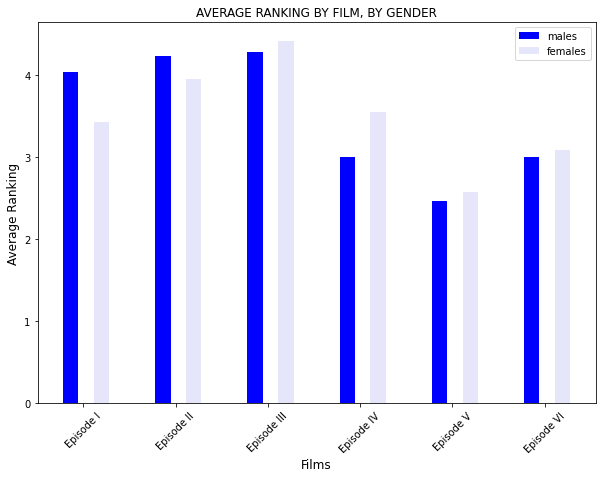

In [27]:
plt.figure(figsize=(10, 7))
y_index = np.array([0,1.5,3,4.5,6,7.5])
height = .5

plt.bar(y_index, males[males.columns[9:15]].mean(), 0.25, align='edge', label='males', color='blue')
plt.bar(y_index+height, females[females.columns[9:15]].mean(), 0.25, align='edge', label='females', color='lavender')

plt.xticks(y_index+(height/1.5), num_cols, rotation = 45)

plt.xlabel('Films', fontsize=12)
plt.ylabel('Average Ranking', fontsize=12)
plt.title('AVERAGE RANKING BY FILM, BY GENDER')
plt.legend()

plt.show()

### The most seen Star Wars movie by gender

**Now let's plot the sum of the *seen* columns by gender**

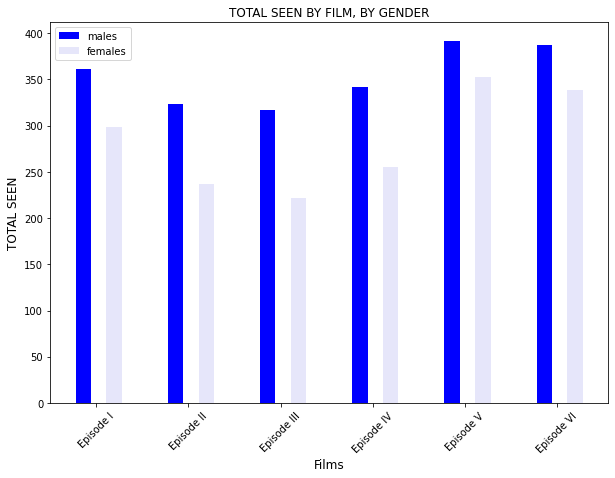

In [28]:
plt.figure(figsize=(10, 7))
y_index = np.array([0,1.5,3,4.5,6,7.5])
height = .5

plt.bar(y_index, males[males.columns[3:9]].sum(), 0.25, align='edge', label='males', color='blue')
plt.bar(y_index+height, females[females.columns[3:9]].sum(), 0.25, align='edge', label='females', color='lavender')

plt.xticks(y_index+(height/1.5), num_cols, rotation = 45)

plt.xlabel('Films', fontsize=12)
plt.ylabel('TOTAL SEEN', fontsize=12)
plt.title('TOTAL SEEN BY FILM, BY GENDER')
plt.legend()

plt.show()

### Location of Star wars fans respondents
We will focus here on respondents who consider themselves to be a fan of Star Wars film franchise.

In [29]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

Text(0.5, 1.0, 'Star Wars fans location')

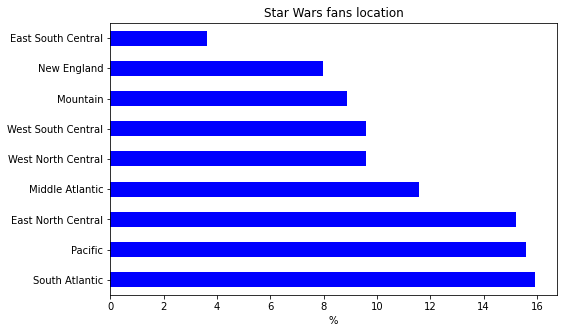

In [32]:
fig,ax = plt.subplots(figsize=[8,5])
ax= (star_wars.loc[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == True,'Location (Census Region)'].value_counts()*100/552).plot.barh(color='blue')

# set x axis label
ax.set_xlabel('%')
# set title
ax.set_title('Star Wars fans location',size=12)

### Education level for Star Wars fans

Text(0.5, 1.0, 'Education level for Star Wars fans who responded to the survey')

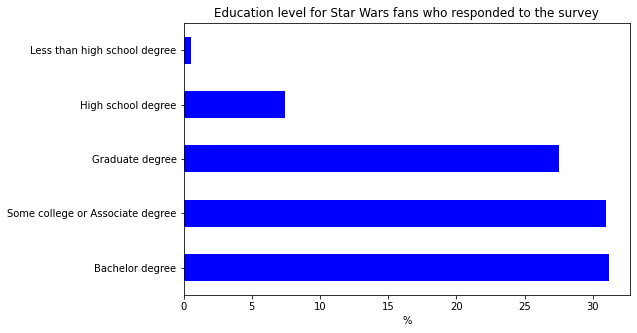

In [33]:
fig,ax = plt.subplots(figsize=[8,5])

ax= (star_wars.loc[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == True,'Education'].value_counts()*100/552).plot.barh(color='blue')

# set x axis label
ax.set_xlabel('%')
# set title
ax.set_title('Education level for Star Wars fans who responded to the survey',size=12)

## Conclusions:

In this project we have explored the Star Wars survey that was made by FiveThirtyEight team. We have found out the following:

* In general, fans seem to prefer the original trilogy of the cinematic saga Star Wars which consists of "A New Hope (1977)", "The Empire Strikes Back (1980)" and "Return of the Jedi (1983)" more than the rest of the collection.
* "Star Wars: Episode V The Empire Strikes Back" is considered by the respondents to be the best film in the saga hence it makes it the most seen Star Wars movie by the fans.
* Men rated the three original movies at the top of their favorite star wars films while only two of the original movies were highly rated by women, they considered "Episode I: The Phantom Menace 1999" more popular than "Episode IV: A New Hope 1977".
* Most of the Star Wars fans who responded to the survey are located in the South Atlantic states, the East North Central, the Pacific and the Middle Atlantic.
* 95% of the Star Wars fans who respond to the survey have more than a High school degree.